In [1]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [4]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
df['target'] = iris.target

In [6]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [8]:
# Let's add a new column
# Creating a new column using existing column 
# we do this in pandas using .apply()

In [9]:
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [10]:
df.shape

(150, 6)

In [11]:
df0 = df[df['target'] == 0]
df1 = df[df['target'] == 1]
df2 = df[df['target'] == 2]

In [12]:
print(df0.shape, df1.shape, df2.shape)

(50, 6) (50, 6) (50, 6)


In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

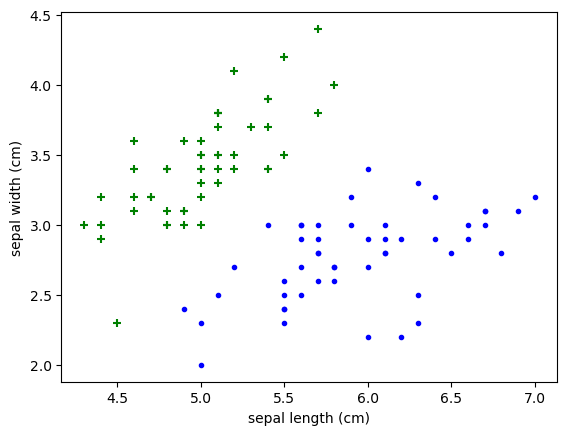

In [14]:
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color = 'green', marker = '+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color = 'blue', marker = '.')

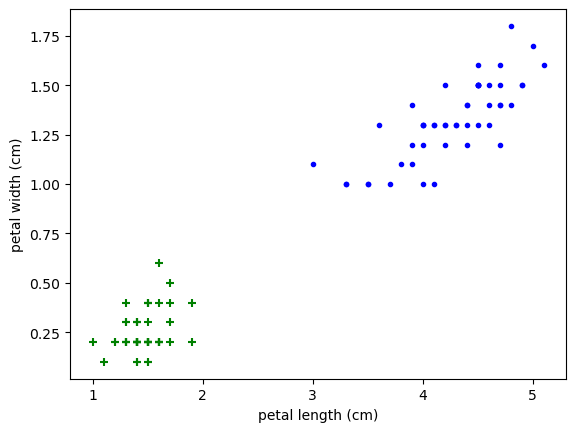

In [15]:
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color = 'green', marker = '+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color = 'blue', marker = '.')

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

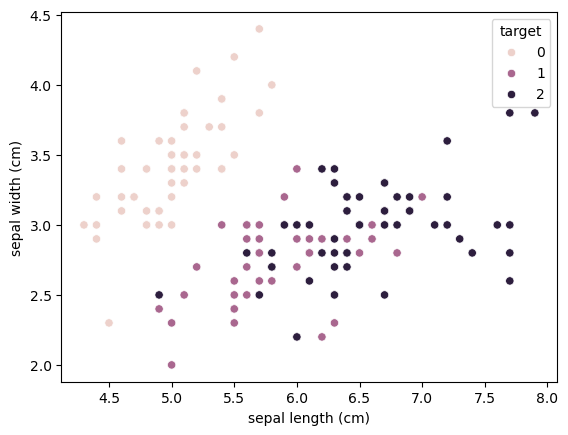

In [16]:
import seaborn as sns
sns.scatterplot(x=df['sepal length (cm)'], y=df['sepal width (cm)'], hue = df['target'])

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X = df.drop(['target', 'flower_name'], axis = 'columns')
# X = df.iloc[:,0:4]   Also
y = df[['target']]
# y= df.iloc[:,4]  Also

In [19]:
print(X,y)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]      target
0         0
1         0
2   

In [20]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [21]:
y.head()

,target
0,0
1,0
2,0
3,0
4,0


In [22]:
type(X)

pandas.core.frame.DataFrame

In [23]:
type(y)

pandas.core.frame.DataFrame

In [24]:
X = df.iloc[:,0:4]
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [25]:
y = df.iloc[:,4]

In [26]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [27]:
type(y)

pandas.core.series.Series

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [46]:
len(X_train)


120

In [47]:
len(X_test)

30

In [48]:
from sklearn.svm import SVC

In [49]:
svc = SVC(C=10)

In [50]:
svc.fit(X_train, y_train)

SVC(C=10)

In [51]:
# the socre will take X_test and predict y and compare it with y_test
svc.score(X_test, y_test)

0.9666666666666667